Preface: I used Python 3 (v 5.5.0) to write this project.

# SPAdes: Assembling a _de novo_ Bacterial Genome

In this lab, I used ```SPAdes``` to assemble an unknown bacterial genome using PacBio and Illumina reads. I then analyzed the assembled genome using ```assembly-stats``` and used ```rna_hmm3.py``` and ```bedtools getfasta``` to isolate 16S rRNA sequences. To identify the source of the genome, I submitted the 16S rRNA sequences to **Seqmatch**. I submitted the assembled genome to **RAST** and **BASys** for annotations, with results used to do research and make conclusions about the genome.

## 1. Running SPAdes

First, some conceptual questions:

_Why do we expect short reads to produce a more fragmented assembly than long reads?_  
Compared to short reads, long reads are more likely to have sequences that overlap with each other. There are thus less equally plausible ways to assemble long reads into a genome. This contrasts with short reads, which have more plausible ways to they can be assembled.

_Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?_  
PacBio sequencing relies on a single DNA polymerase to incorporate fluorescently-tagged nucleotides to substrate DNA without prior amplification. Meanwhile, Illumina sequencing uses amplification to increase signal and leaves all nucleotides labeled (furthermore, Illumina sequencing reads both the complement and reverse-complement strands). Amplification results in stronger signal and thus probably accounts for why Illumina reads are more accurate for shorter reads. For longer reads, sequencing starts to go out-of-phase due to DNA polymerase error.

### **SPAdes**

Using reads provided by BioE 131 staff, I assembled the genome using ```SPAdes``` in Terminal:

```spades.py -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -t 1 -o .```

```SPAdes``` is a hybrid genome assembler that, in this case, used PacBio and Illumina contigs. Assembly took around 20 hours to complete.

## 2. Generating Assembly Statistics

I analyzed the assembled genome (```contigs.fasta``` and ```scaffolds.fasta```) using ```assembly-stats``` in Terminal:

```assembly-stats contigs.fasta scaffolds.fasta```

### **Statistical Analyses**

```
stats for contigs.fasta
sum = 6678635, n = 176, ave = 37946.79, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81286, n = 30
N100 = 128, n = 176
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for scaffolds.fasta
sum = 6678655, n = 174, ave = 38383.07, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81821, n = 30
N100 = 128, n = 174
N_count = 20
Gaps = 2
```

_Why is N50 a useful statistic to calculate? Why not just list the mean or median contig length?_  
By definition, N50 refers to the minimum contig length to cover 50% of the genome. As such, N50 is a weighted median value that provides a better statistical understanding of the genome assembly--there are contigs that may be too short to be useful. The mean and median contig lengths may be biased towards smaller sizes, skewing a statistical understanding of the assembled genome.

_In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?_  
The scaffolds are slightly longer than the contigs, around 436.28 bases longer. This is due to the fact that scaffolds are sets of contigs that have some overlap, but oft some overhang regions as well. But this difference is relatively small (~1% of average contig length).

### Extra Credit: Contig Coverage

I first extracted the coverage of the 176 contigs using **Excel**. These 176 data points were plotted using ```matplotlib```.

Text(0, 0.5, '# Contigs')

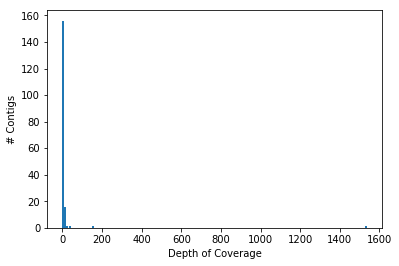

In [2]:
import matplotlib.pyplot as plt

coverage = [(7.740928, 10.006665, 7.539874, 9.114046, 9.241629, 8.918606, 8.126053, 8.706677, 7.455302, 7.139043, 8.64251, 7.910328, 6.973549, 8.264545, 7.418715, 8.846256, 8.57711, 9.584186, 8.773953, 7.418265, 7.113839, 8.039997, 10.081286, 7.785886, 7.854012, 8.146401, 7.136158, 8.555536, 7.722379, 9.311795, 8.238385, 9.074883, 7.372789, 7.420957, 6.46957, 8.116505, 7.61281, 7.993083, 7.424264, 7.895898, 7.608171, 7.601905, 7.314205, 8.45544, 14.119172, 10.363252, 5.239566, 7.030905, 5.388827, 0.708005, 9.625, 6.539275, 0.427495, 4.630975, 0.934599, 0.812236, 0.803797, 6.890063, 0.900634, 0.898649, 8.990244, 0.98005, 0.97878, 0.929919, 0.937669, 0.834688, 0.9375, 0.923706, 0.937158, 0.958217, 0.958217, 0.944134, 1.002801, 0.72191, 0.974576, 0.977337, 0.864023, 0.982906, 0.985714, 0.933526, 0.742775, 0.94186, 1.008772, 0.918129, 1.008798, 0.692082, 0.970588, 1.02071, 0.946588, 0.952381, 1.026866, 0.855856, 1.638554, 1.039275, 1.021148, 0.740181, 1.045455, 0.936364, 0.681818, 0.772036, 0.929664, 0.642202, 2.276074, 1, 0.92638, 0.769939, 1, 0.969231, 0.963077, 0.849231, 1.055556, 1.006173, 0.987654, 0.728395, 1.065015, 0.650155, 0.975155, 0.928571, 1.071651, 1.053125, 0.98125, 0.9279, 0.782334, 0.702532, 1.092063, 0.879365, 0.869427, 0.859425, 0.84345, 1.092949, 0.877814, 0.836013, 1.093548, 0.909677, 0.841935, 1.135922, 1.11039, 0.714286, 0.644951, 0.918301, 0.859477, 0.787582, 0.84918, 0.836066, 1.082237, 1.033003, 0.838284, 0.688742, 0.930233, 6.848, 6.79803, 11.80597, 6.305085, 3.566265, 13.716312, 2.442029, 25.487805, 13.710526, 17.648148, 37.012821, 4.408451, 8.758065, 6.785714, 2.042553, 13.767442, 2.692308, 8.297297, 4.84375, 17.055556, 14.785714, 7.071429, 5.714286, 4.214286, 17, 1536, 150)]

plt.hist(coverage, 176)
plt.xlabel('Depth of Coverage') 
plt.ylabel('# Contigs')

Text(0, 0.5, '# Contigs')

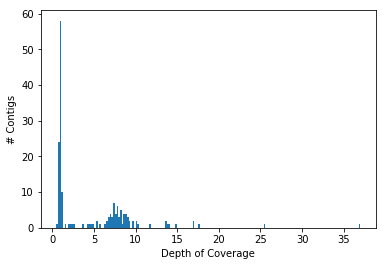

In [3]:
# Histogram excluding outliers with coverage values 150 and 1536

import matplotlib.pyplot as plt

coverage = [(7.740928, 10.006665, 7.539874, 9.114046, 9.241629, 8.918606, 8.126053, 8.706677, 7.455302, 7.139043, 8.64251, 7.910328, 6.973549, 8.264545, 7.418715, 8.846256, 8.57711, 9.584186, 8.773953, 7.418265, 7.113839, 8.039997, 10.081286, 7.785886, 7.854012, 8.146401, 7.136158, 8.555536, 7.722379, 9.311795, 8.238385, 9.074883, 7.372789, 7.420957, 6.46957, 8.116505, 7.61281, 7.993083, 7.424264, 7.895898, 7.608171, 7.601905, 7.314205, 8.45544, 14.119172, 10.363252, 5.239566, 7.030905, 5.388827, 0.708005, 9.625, 6.539275, 0.427495, 4.630975, 0.934599, 0.812236, 0.803797, 6.890063, 0.900634, 0.898649, 8.990244, 0.98005, 0.97878, 0.929919, 0.937669, 0.834688, 0.9375, 0.923706, 0.937158, 0.958217, 0.958217, 0.944134, 1.002801, 0.72191, 0.974576, 0.977337, 0.864023, 0.982906, 0.985714, 0.933526, 0.742775, 0.94186, 1.008772, 0.918129, 1.008798, 0.692082, 0.970588, 1.02071, 0.946588, 0.952381, 1.026866, 0.855856, 1.638554, 1.039275, 1.021148, 0.740181, 1.045455, 0.936364, 0.681818, 0.772036, 0.929664, 0.642202, 2.276074, 1, 0.92638, 0.769939, 1, 0.969231, 0.963077, 0.849231, 1.055556, 1.006173, 0.987654, 0.728395, 1.065015, 0.650155, 0.975155, 0.928571, 1.071651, 1.053125, 0.98125, 0.9279, 0.782334, 0.702532, 1.092063, 0.879365, 0.869427, 0.859425, 0.84345, 1.092949, 0.877814, 0.836013, 1.093548, 0.909677, 0.841935, 1.135922, 1.11039, 0.714286, 0.644951, 0.918301, 0.859477, 0.787582, 0.84918, 0.836066, 1.082237, 1.033003, 0.838284, 0.688742, 0.930233, 6.848, 6.79803, 11.80597, 6.305085, 3.566265, 13.716312, 2.442029, 25.487805, 13.710526, 17.648148, 37.012821, 4.408451, 8.758065, 6.785714, 2.042553, 13.767442, 2.692308, 8.297297, 4.84375, 17.055556, 14.785714, 7.071429, 5.714286, 4.214286, 17)]

plt.hist(coverage, 176)
plt.xlabel('Depth of Coverage') 
plt.ylabel('# Contigs')

[0, 10, 0, 60]

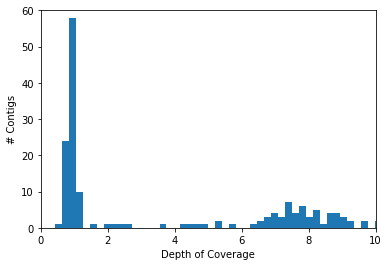

In [4]:
# Histogram for contigs with coverage values <10

import matplotlib.pyplot as plt

coverage = [(7.740928, 10.006665, 7.539874, 9.114046, 9.241629, 8.918606, 8.126053, 8.706677, 7.455302, 7.139043, 8.64251, 7.910328, 6.973549, 8.264545, 7.418715, 8.846256, 8.57711, 9.584186, 8.773953, 7.418265, 7.113839, 8.039997, 10.081286, 7.785886, 7.854012, 8.146401, 7.136158, 8.555536, 7.722379, 9.311795, 8.238385, 9.074883, 7.372789, 7.420957, 6.46957, 8.116505, 7.61281, 7.993083, 7.424264, 7.895898, 7.608171, 7.601905, 7.314205, 8.45544, 14.119172, 10.363252, 5.239566, 7.030905, 5.388827, 0.708005, 9.625, 6.539275, 0.427495, 4.630975, 0.934599, 0.812236, 0.803797, 6.890063, 0.900634, 0.898649, 8.990244, 0.98005, 0.97878, 0.929919, 0.937669, 0.834688, 0.9375, 0.923706, 0.937158, 0.958217, 0.958217, 0.944134, 1.002801, 0.72191, 0.974576, 0.977337, 0.864023, 0.982906, 0.985714, 0.933526, 0.742775, 0.94186, 1.008772, 0.918129, 1.008798, 0.692082, 0.970588, 1.02071, 0.946588, 0.952381, 1.026866, 0.855856, 1.638554, 1.039275, 1.021148, 0.740181, 1.045455, 0.936364, 0.681818, 0.772036, 0.929664, 0.642202, 2.276074, 1, 0.92638, 0.769939, 1, 0.969231, 0.963077, 0.849231, 1.055556, 1.006173, 0.987654, 0.728395, 1.065015, 0.650155, 0.975155, 0.928571, 1.071651, 1.053125, 0.98125, 0.9279, 0.782334, 0.702532, 1.092063, 0.879365, 0.869427, 0.859425, 0.84345, 1.092949, 0.877814, 0.836013, 1.093548, 0.909677, 0.841935, 1.135922, 1.11039, 0.714286, 0.644951, 0.918301, 0.859477, 0.787582, 0.84918, 0.836066, 1.082237, 1.033003, 0.838284, 0.688742, 0.930233, 6.848, 6.79803, 11.80597, 6.305085, 3.566265, 13.716312, 2.442029, 25.487805, 13.710526, 17.648148, 37.012821, 4.408451, 8.758065, 6.785714, 2.042553, 13.767442, 2.692308, 8.297297, 4.84375, 17.055556, 14.785714, 7.071429, 5.714286, 4.214286, 17)]

plt.hist(coverage, 176)
plt.xlabel('Depth of Coverage') 
plt.ylabel('# Contigs')
plt.axis([0,10,0,60])

_Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?_  
The coverage is **not** uniformly distributed. In fact, most contigs seem to have very low coverages (<10). The plot seems to be Gaussian **bimodal**, with modes of ~1 and ~7.5 observed.

_What explains the presence of contigs with coverage an integer multiple of the mean coverage?_  
Contigs with coverages that are integer multiples of the mean coverage (**4.519618** excluding outliers 150 and 1536, **14.047804** including all contigs) may simply be repetitive contigs or contigs that contain repetitive sequences in the genome.

## 3. Origin of Assembled Genome

I used the conserved 16S ribosomal subunit RNA gene to determine the identity of the genome's taxon. To do this, I first ran ```rna_hmm3.py``` in Terminal to locate 16S rRNA genes:

```rna_hmm3.py -i contigs.fasta -m ssu -o rRNA.GFF```

```-m ssu``` specifies molecule type search to 16S rRNA (as per [Weizhong Li](http://weizhong-lab.ucsd.edu/meta_rna/readme_H3.txt)).

Then, I used ```bedtools getfasta``` to extract 16S rRNA sequences:

```bedtools getfasta -fi contigs.fasta -bed rRNA.GFF.fa```

### **16S rRNA Genes**

```
>NODE_23_length_103367_cov_10.081286:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_18_length_154232_cov_9.584186:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_5_length_327223_cov_9.241629:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_6_length_298784_cov_8.918606:13925-15470
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_4_length_332509_cov_9.114046:137011-138556
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_2_length_378948_cov_10.006665:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
```

### **Seqmatch**

Using the Ribosomal Database Project's **Seqmatch** tool, I was able to narrow down the genome source to the genus _Pseudomonas_. Based on similarity scores, I suspect the genome source to be _Pseudomonas frederiksbergensis_ (S_ab 1.000). However, there are many other _Pseudomonas_ species with very homologous sequences (~0.985). This is not surprising, given that the 16S rRNA gene is evolutionarily conserved.

## 4. Genome Annotation

I uploaded my assembled genome (```scaffolds.fasta```) to **RAST** (651872) and **BASys** (MX_1) for annotations.

**RAST** specifications: _Pseudomonas sp._, genetic code 11, RASTtk annotation scheme, automatic error fix, backfill gaps  
**BASys** specifications: _Pseudomonas sp._, bacterial genetic code, negative Gram stain, circular DNA



## 5. Research and Summary of Annotations

<sup>1</sup> [Anderson et al., Int. J. Syst. Evol. Microbiol (2000)](http://www.microbiologyresearch.org/docserver/fulltext/ijsem/50/6/0501957a.pdf?expires=1540087302&id=id&accname=guest&checksum=328AB9D034D8807D9FBA549A648CA898)  
<sup>2</sup> [Adam et al., Appl. Environ. Microbiol (2005)](https://aem.asm.org/content/aem/71/4/2199.full.pdf)

To generalize, members of the genus _Pseudomonas_ are Gram-negative and occupy a wide range of ecological niches. _Pseudomonas frederiksbergensis_, recently discovered as a "phenanthrene-degrading bacteria from a coal gasification site" near Copenhagen, Denmark, is no exception.<sup>1</sup> The genome annotations support that _P. frederiksbergensis_ is Gram-negative: there are no Gram-positive cell wall components in the assembled genome.

Andersen et al. note the relatively high GC content of _P. frederiksbergensis_, 59.6%, using biochemical methods (hydroxyapatite column, hydrolysis with P1 nuclease, dephosphorylation with bovine alkaline phosphatase, analysis by HPLC). This is very close to the genomic GC content of the assembled genome, 58.7%. Though higher than a stochastic GC content of 50%, there is by no means any indication _P. frederiksbergensis_ is thermophilic. Indeed, the authors note that _P. frederiksbergensis_ grew at 4° and 30°C, but not 37°C. This tells us that _P. frederiksbergensis_ (a) grews in relatively temperate conditions (like those in Denmark) and (b) is not pathogenic in humans.

Pathogenicity is an interesting point to note because much research has been conducted on pathogenic strains of _Pseudomonas_, in particular _P. aeruginosa_. No studies indicate that _P. frederiksbergensis_ is pathogenic, and its lack of growth at 37°C substantiates this point. Furthermore, the genome annotations show there are no genes that confer virulence or interruption of eukaryotic signal transduction pathways.

With regards to bacteriocins, antiobiotics, and toxins, the assembled genome has genes for many. For example, the genome confers resistance to streptothricin, fluoroquinolones, fosfomycin, penicillin, and ampicillin. There are also multidrug resistance efflux pumps, of which may confer immunity to tetracycline and chloramphenicol. These gens may have been transfered by horizontal gene transfer, given their ubiquity in Gram-negative bacteria.  

More interestingly, the genome has several enzymes that allow _P. frederiksbergensis_ to thrive in environments with high heavy metal concentrations. In particular, the genome encodes enzymes that allow _P. frederiksbergensis_ to better process copper, cobalt, zinc, cadmium, copper, and chromium. This makes sense from an evolutionary standpoint, considering _P. frederiksbergensis_ was discovered in a coal gasification site. Unsurprisingly, coal gasification sites tend to have high heavy metal concentrations that may otherwise be toxic.

It is also interesting to consider how specific bacteria metabolize sulfur compounds. _P. frederiksbergensis_ was found to oxidize sulfides into sulfoxides.<sup>2</sup> Adam et al. write that _P. frederiksbergensis_ perform asymmetrically oxidizes methyl sulfides to (R) sulfoxides. The annotations show that there are many genes (42) related to sulfur assimilation, oxidation, and reduction in the assembled genome. This lends weight to the findings from Adam et al., and vice versa. Given the high concentration of sulfur compounds in coal, this finding is not surprising.

The annotations do not indicate the presence of any CRISPR systems in the assembled genome. This is supported by the fact there are phage mobile genetic elements in the assembled genome. The annotations also indicate that the bacterium is not auxotrophic for any amino acid. There are numerous auxotrophic strains of _Pseudomonas_, such as methionine, leucine, and arginine _P. aeruginosa_ auxotrophs.

**In summary, the annotations show that the assembled genome is from a Gram-negative bacterium adapted to live in environments with high heavy metal and sulfur concentrations. The wide range of antibiotic resistances in the genome is evidence of horizontal gene transfer. The assembled genome shows no indication its source is pathogenic. The annotations support my prediction that the genome source is _P. frederiksbergensis_ as described by Andersen et al. and Adam et al.**